In [1]:
# Class name: AI1811
# Student code: HE181685
# Student name: Nguyễn Thành Trung
# Subject: CPV301-LAB4

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color, io, img_as_float
from skimage.segmentation import active_contour
from sklearn.cluster import MeanShift, estimate_bandwidth

 C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


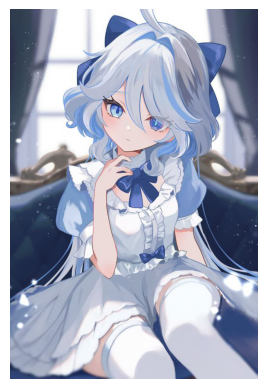

In [31]:

# Tải hình ảnh
image_path=input("Nhập đường dẫn đến tệp hình ảnh: ")
img = mpimg.imread(image_path)

# Kiểm tra nếu hình ảnh được tải thành công
if image is None:
    print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
else:
    # Hiển thị hình ảnh
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


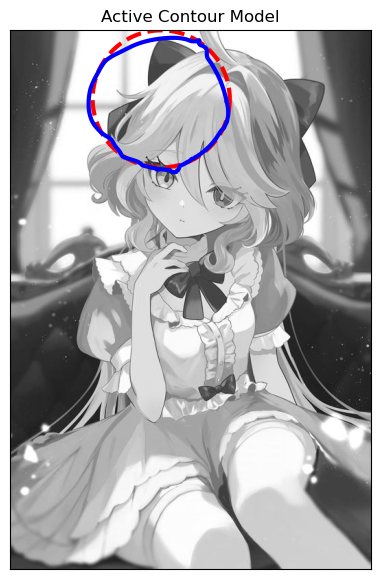

In [15]:
## Function 1: Snakes algorithm
# Tạo hàm
def snakes_algorithm(image_path):
    # Đọc hình ảnh
    image = img_as_float(color.rgb2gray(io.imread(image_path)))
    # Kiểm tra nếu hình ảnh được tải thành công
    if image is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    
    # Khởi tạo đường cong (snake) ban đầu
    s = np.linspace(0, 2 * np.pi, 400)
    x = 220 + 100 * np.cos(s)
    y = 100 + 100 * np.sin(s)
    init = np.array([x, y]).T
    
    # Áp dụng thuật toán Snakes
    snake = active_contour(image, init, alpha=0.015, beta=10, gamma=0.001)
    
    # Hiển thị kết quả
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(image, cmap=plt.cm.gray)
    ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
    ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Active Contour Model')
    plt.show()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
snakes_algorithm(image_path)


Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


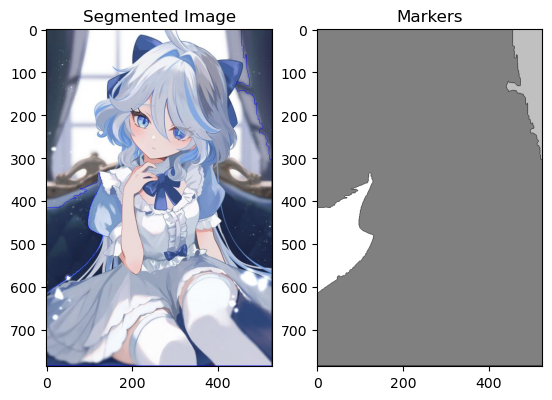

In [17]:
## Function 2: Watershed algorithm
# Tạo hàm
def watershed_segmentation(image_path):
    # Đọc hình ảnh
    image = cv2.imread(image_path)
    
    # Kiểm tra nếu hình ảnh được tải thành công
    if image is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    
    # Chuyển đổi sang thang độ xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Áp dụng ngưỡng
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Loại bỏ nhiễu bằng phép toán hình thái học
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Xác định vùng nền chắc chắn
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Tìm vùng tiền cảnh chắc chắn
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    
    # Tìm vùng không chắc chắn
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Đánh dấu các điểm đánh dấu
    ret, markers = cv2.connectedComponents(sure_fg)
    
    # Thêm 1 vào tất cả các nhãn để đảm bảo nền không bị đánh dấu là 0
    markers = markers + 1
    
    # Đánh dấu vùng không chắc chắn là 0
    markers[unknown == 255] = 0
    
    # Áp dụng thuật toán Watershed
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]
    
    # Hiển thị kết quả
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
    plt.subplot(122), plt.imshow(markers, cmap='gray'), plt.title('Markers')
    plt.show()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
watershed_segmentation(image_path)


Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


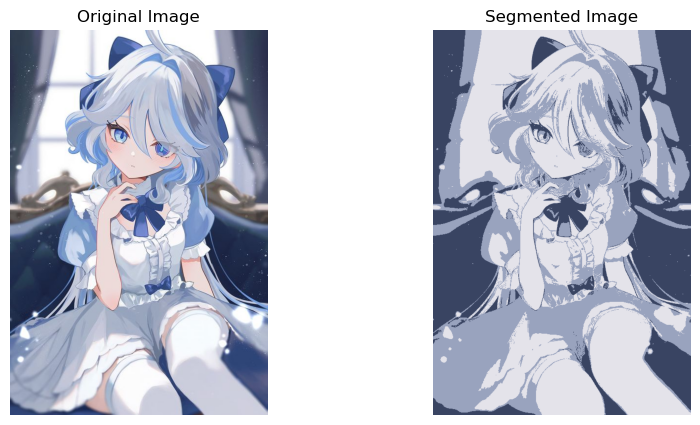

In [19]:
## Function 3: K-means for Segmentation
# Tạo hàm 
def kmeans_segmentation(image_path, k=3):
    # Đọc hình ảnh
    image = cv2.imread(image_path)
    
    # Kiểm tra nếu hình ảnh được tải thành công
    if image is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    
    # Chuyển sang không gian màu RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Chuẩn bị dữ liệu
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Xác định tiêu chí dừng và số lần khởi tạo
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Chuyển đổi các trung tâm cụm thành giá trị màu
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    
    # Chuyển đổi hình ảnh phân đoạn thành hình dạng ban đầu
    segmented_image = segmented_image.reshape(image.shape)
    
    # Hiển thị hình ảnh gốc và hình ảnh phân đoạn
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.show()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
kmeans_segmentation(image_path)


Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


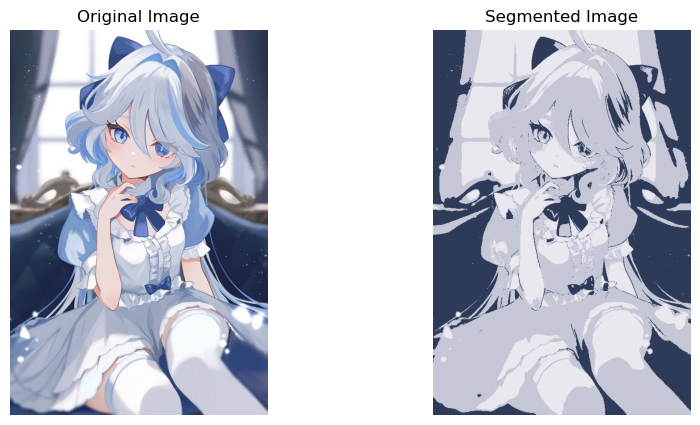

In [21]:
## Function 4: Mean shift algorithm for Segmentation
# Tạo hàm
def mean_shift_segmentation(image_path):
    # Đọc hình ảnh
    image = cv2.imread(image_path)
    
    # Kiểm tra nếu hình ảnh được tải thành công
    if image is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    
    # Chuyển đổi sang không gian màu RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Chuẩn bị dữ liệu
    flat_image = np.reshape(image, [-1, 3])
    
    # Ước lượng băng thông cho Mean Shift
    bandwidth = estimate_bandwidth(flat_image, quantile=0.2, n_samples=500)
    
    # Áp dụng thuật toán Mean Shift
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(flat_image)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    # Chuyển đổi các nhãn cụm thành giá trị màu
    segmented_image = cluster_centers[np.reshape(labels, image.shape[:2])]
    segmented_image = segmented_image.astype(np.uint8)
    
    # Hiển thị hình ảnh gốc và hình ảnh phân đoạn
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.show()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
mean_shift_segmentation(image_path)
